## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [67]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [68]:
df = pd.read_csv('Iris.csv')

In [69]:
# Check dimension of data
df.shape

(152, 6)

In [70]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Check data Type

In [71]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [72]:
# Check for NaN/Null values
df_na = df[df.isna().any(axis=1)]
df_na

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [73]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [84]:
# Replace null values with median values
df_out = df.fillna(df.median())
df_out.iloc[150:152, :]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [85]:
df_out.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
# remove Id column from dataframe
df_out.drop('Id', axis=1, inplace=True)
df_out.head()

#Separate independent values in X and y. Remove Id & Species columns from independent variables
X = df_out.iloc[:, 0:4]
y = df_out.iloc[:, 4]

In [87]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [88]:
y.describe()

count                152
unique                 3
top       Iris-virginica
freq                  52
Name: Species, dtype: object

In [89]:
y.value_counts()
# three classes with frequencies of 52,50,50 each in the dataset. Almost equal distribution of data is provided. 
# The model will not have a bias in terms of input data 

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

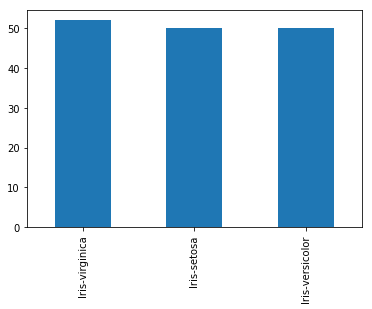

In [90]:
y.head()
y.value_counts().plot(kind='bar')


#### three classes with frequencies of 52,50,50 each in the dataset. Almost equal distribution of data is provided. 
#### The model will not have a bias in terms of input data 

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

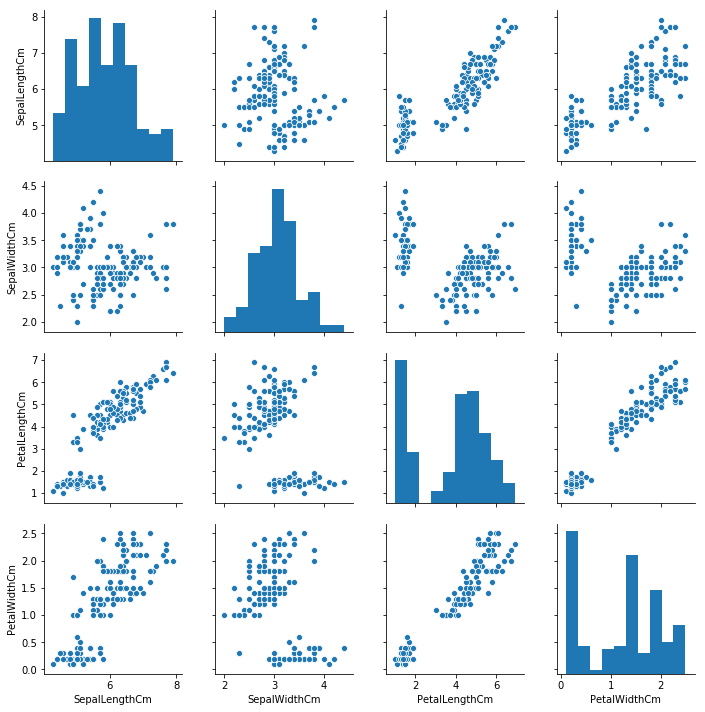

In [122]:
sns.pairplot (df_out)
# Based on the scatter matrix, 

#Correlation observation:
# (1) there is a strong correlation between SepalLengthCm and PetalLengthCm
# (2) there is a strong correlation between SepalLengthCm and PetalWidthCm
# (3) there is a strong correlation between PetalLengthCm and PetalWidthCm
# SepalLengthCm and SepalWidthCm should be right independent variables

# Distribution observation:
# SepalWidthCm looks close to normal distribution, 
# SepalLengthCm - distribution looks fine except few exceptions
# based on statistics data, mean and median are very close for SepalLengthCm and SepalWidthCm
# Based on Boxplots, SepalWidthCm has few outliers


### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [93]:
df_out.describe(include='all')

# SepalWidthCm looks close to normal distribution, 
# SepalLengthCm - distribution looks fine except few exceptions
# based on statistics data, mean and median are very close for SepalLengthCm and SepalWidthCm
# Based on Boxplots, SepalWidthCm has few outliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,152.000000,152.000000,152.000000,152.000000,152
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,52
mean,5.843421,3.053289,3.766447,1.203289,NaN
std,0.822584,0.430757,1.754000,0.759698,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


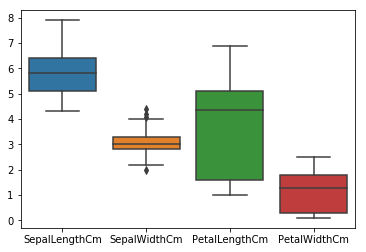

In [124]:
sns.boxplot(data=df_out)

In [ ]:
# Drop Id variable from data
# This is already done earlier 

In [120]:
Q1 = df_out.quantile(0.25)
Q3 = df_out.quantile(0.75)
IQR = Q3 - Q1
IQR

(df_out < (Q1 - 1.5 * IQR)) |(df_out > (Q3 + 1.5 * IQR))


,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Correlation among all variables and give your insights (1 Marks)

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [123]:
df_out.corr(method='pearson')

#Correlation observation (from both scatter plots and correlation values)
# (1) there is a good correlation between SepalLengthCm and PetalLengthCm
# (2) there is a good correlation between SepalLengthCm and PetalWidthCm
# (3) there is a strong correlation between PetalLengthCm and PetalWidthCm
# SepalLengthCm and SepalWidthCm should be right independent variables and 
# other variables should be removed from list of independent variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


### Split data in Training and Validation in 80:20 (1 Marks)

In [127]:
### SPLITTING INTO TRAINING AND TEST SETS
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X train', X_train.shape)
print ('X test', X_test.shape)
print ('y train', y_train.shape)
print ('y test', y_test.shape)


X train (121, 4)
X test (31, 4)
y train (121,)
y test (31,)


### Do Feature Scaling ( 1 Marks)

In [134]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(X)
scaler.transform

<bound method StandardScaler.transform of StandardScaler(copy=     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5           1.40           0.2
1              4.9           3.0           1.40           0.2
2              4.7           3.2           1.30           0.2
3              4.6           3.1           1.50...           1.3
151            5.8           3.0           4.35           1.8

[152 rows x 4 columns],
        with_mean=True, with_std=True)>

### Train and Fit NaiveBayes Model(2 Marks)

In [135]:
#Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)


In [145]:
#Predict
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

print("Number of mislabeled points out of a total %d points in training data: %d" % (X_train.shape[0],(y_train != y_pred_train).sum()))

print("Number of mislabeled points out of a total %d points in test data: %d" % (X_test.shape[0],(y_test != y_pred_test).sum()))


Number of mislabeled points out of a total 121 points in training data: 7
Number of mislabeled points out of a total 31 points in test data: 1


In [142]:
gnb.score(X_train, y_train)

0.9421487603305785

In [143]:
gnb.score(X_test, y_test)

0.967741935483871

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [ ]:
# show Confusion Matrix

In [149]:
from sklearn import metrics
metrics.confusion_matrix (y_test, y_pred_test)


array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]], dtype=int64)

In [ ]:
# show accuracy

In [150]:
gnb.score(X_train, y_train)

0.9421487603305785

In [151]:
gnb.score(X_test, y_test)

0.967741935483871

In [ ]:
#Show precision and Recall metrics

In [154]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
pscore = precision_score(y_test, y_pred_test, average='macro') 
rscore = recall_score(y_test, y_pred_test, average='macro') 
print ("precision score ", pscore)
print ("recall score ", rscore)


precision score  0.9629629629629629
recall score  0.9743589743589745


In [ ]:
# Accuracy for test data is very good, better than training data. this shows the model is not overfitting and can be considered 
# a reliable model

# Both Precision Score and Recall score are also high. This shows that 97% of the labels could be predicted and 96% of the 
# times the prediction was correct

# Overall based on the Accuracy, Precision, recall, the Model looks good


## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [164]:
df_knn = pd.read_csv('Iris.csv')
print ('df_knn.shape ', df_knn.shape)
print ('df_knn.dtypes ', df_knn.dtypes)

df_knn.shape  (152, 6)
df_knn.dtypes  Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [165]:
# Check for NaN/Null values
df_knn_na = df_knn[df_knn.isna().any(axis=1)]
df_knn_na

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [166]:
# Replace null values with median values
df_knn_out = df_knn.fillna(df_knn.median())
df_knn_out.iloc[150:152, :]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


In [ ]:
# drop Id
df_knn_out.drop

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [167]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [178]:
df_knn_out['Species'] = le.fit_transform(df_knn_out['Species'])

In [180]:
print (df_knn_out.head())
df_knn_out.dtypes

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [182]:
# remove Id column from dataframe
df_knn_out.drop('Id', axis=1, inplace=True)
df_knn_out.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [183]:
df_knn_out.corr(method='pearson')

#Correlation observation (from both scatter plots and correlation values)
# (1) there is a good correlation between SepalLengthCm and PetalLengthCm
# (2) there is a good correlation between SepalLengthCm and PetalWidthCm
# (3) there is a strong correlation between PetalLengthCm and PetalWidthCm
# SepalLengthCm and SepalWidthCm should be right independent variables and 
# other variables should be removed from list of independent variables

# There is no variable with correlation in range -0.1 to 0.1 with target variable; hence not dropping the variable

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [184]:
df_knn_out.var() 

# Based on the vairanc data, no variable has variance < 0.1



SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

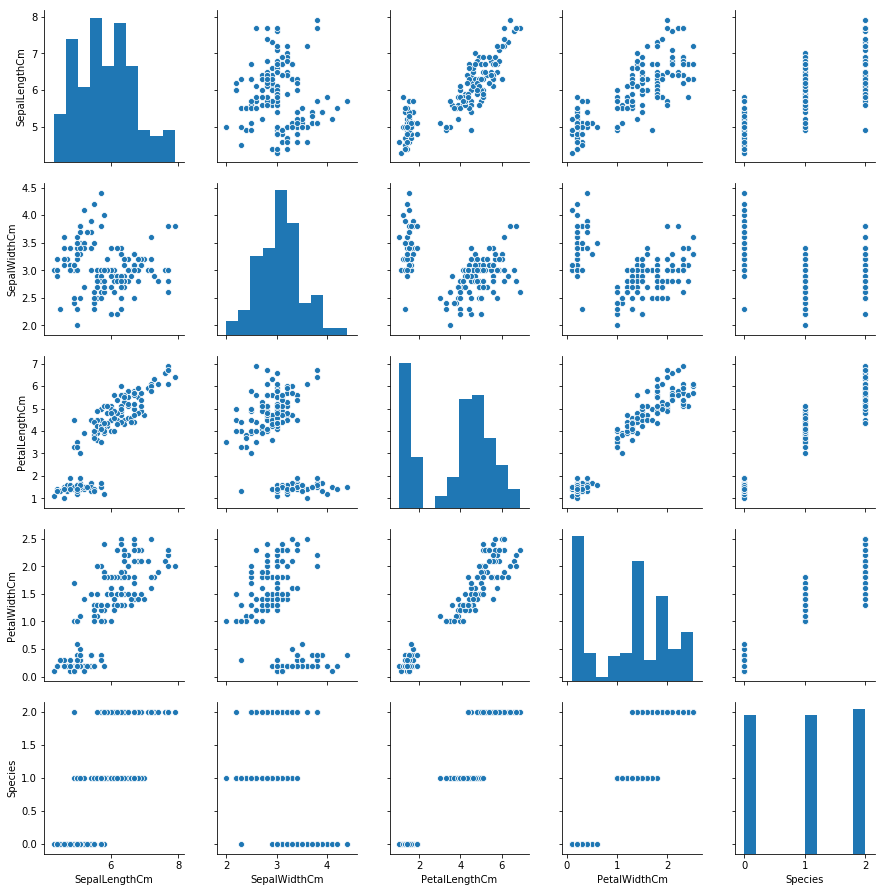

In [185]:
sns.pairplot (df_knn_out)
# Based on the scatter matrix, 

#Correlation observation:
# (1) there is a strong correlation between SepalLengthCm and PetalLengthCm
# (2) there is a strong correlation between SepalLengthCm and PetalWidthCm
# (3) there is a strong correlation between PetalLengthCm and PetalWidthCm
# SepalLengthCm and SepalWidthCm should be right independent variables

# Distribution observation:
# SepalWidthCm looks close to normal distribution, 
# SepalLengthCm - distribution looks fine except few exceptions
# based on statistics data, mean and median are very close for SepalLengthCm and SepalWidthCm
# Based on Boxplots, SepalWidthCm has few outliers

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [189]:
#Separate independent values in X and y. Remove Id & Species columns from independent variables
X = df_knn_out.iloc[:, 0:4]
y = df_knn_out.iloc[:, 4]
print ( 'X.shape ', X.shape)
print ( 'y.shape ', y.shape)
X.head

X.shape  (152, 4)
y.shape  (152,)


<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5           1.40           0.2
1              4.9           3.0           1.40           0.2
2              4.7           3.2           1.30           0.2
3              4.6           3.1           1.50           0.2
4              5.0           3.6           1.40           0.2
5              5.4           3.9           1.70           0.4
6              4.6           3.4           1.40           0.3
7              5.0           3.4           1.50           0.2
8              4.4           2.9           1.40           0.2
9              4.9           3.1           1.50           0.1
10             5.4           3.7           1.50           0.2
11             4.8           3.4           1.60           0.2
12             4.8           3.0           1.40           0.1
13             4.3           3.0           1.10           0.1
14             5.8           4.0        

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [190]:
### SPLITTING INTO TRAINING AND TEST SETS
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ('X train', X_train.shape)
print ('X test', X_test.shape)
print ('y train', y_train.shape)
print ('y test', y_test.shape)


X train (121, 4)
X test (31, 4)
y train (121,)
y test (31,)


In [191]:
from sklearn.neighbors import KNeighborsClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

knn3 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn3.fit(X_train,y_train)

#Predict the response for test dataset
y_test_pred = knn3.predict(X_test)



# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.967741935483871


In [198]:
k_arr = []
mse_arr = []

for k in {1,3,5,7,9,11,13,15,17,19}:
    print ('k - ', k)
    knn = KNeighborsClassifier(n_neighbors= k)

    # Train the model using the training sets
    knn.fit(X_train,y_train)

    #Predict the response for test dataset
    y_test_pred = knn.predict(X_test)


    # Model Accuracy
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Accuracy:", accuracy)
    
    mse = 1 - accuracy
    
    if k == 1:
        lowmse = mse
        lowk = k
        print("first low mse:", lowmse) 
    
    print("mse:", mse)
    
    

    # an element is added
    k_arr.append(k)
    mse_arr.append(mse)
    
    if mse < lowmse :
        lowmse = mse
        lowk = k
        print("new low mse:", lowmse)
        print("new low k:", lowk)
    
print ('optimum k - ', lowk)
print ('optimum mse - ', lowmse)

k -  1
Accuracy: 0.9032258064516129
first low mse: 0.09677419354838712
mse: 0.09677419354838712
k -  3
Accuracy: 0.967741935483871
mse: 0.032258064516129004
new low mse: 0.032258064516129004
new low k: 3
k -  5
Accuracy: 0.967741935483871
mse: 0.032258064516129004
k -  7
Accuracy: 0.967741935483871
mse: 0.032258064516129004
k -  9
Accuracy: 0.967741935483871
mse: 0.032258064516129004
k -  11
Accuracy: 0.967741935483871
mse: 0.032258064516129004
k -  13
Accuracy: 0.967741935483871
mse: 0.032258064516129004
k -  15
Accuracy: 0.967741935483871
mse: 0.032258064516129004
k -  17
Accuracy: 0.967741935483871
mse: 0.032258064516129004
k -  19
Accuracy: 0.967741935483871
mse: 0.032258064516129004
optimum k -  3
optimum mse -  0.032258064516129004


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [ ]:
# from above calculation, optimum number of neighbours, k = 3

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [200]:
print (k_arr)
print (mse_arr)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
[0.09677419354838712, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004, 0.032258064516129004]


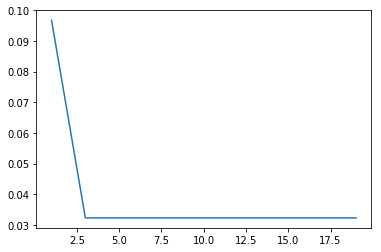

In [201]:
import matplotlib.pyplot as plt
plt.plot(k_arr, mse_arr)
plt.show()